Required Imports


In [ ]:
import random
import math
import matplotlib.pyplot as plt

Problem Definition:

We have 6 jobs and 3 machines



In [ ]:
# Problem definition
num_jobs = 6
num_machines = 3
processing_times = [2, 3, 4, 6, 2, 2]

Cost Function:

Makespan

In [ ]:
def makespan(solution):
    """
    Given a solution (list of length num_jobs),
    solution[j] = machine (0-based) to which job j is assigned.
    Returns the maximum load among all machines.
    """
    loads = [0] * num_machines
    for job_index, machine_id in enumerate(solution):
        loads[machine_id] += processing_times[job_index]
    return max(loads)


Neighberhood Operator

In [ ]:
def generate_neighbor(solution):
    """
    Generate a neighbor by moving exactly one job to a different random machine.
    """
    neighbor = solution[:]
    job_to_move = random.randint(0, num_jobs - 1)
    current_machine = neighbor[job_to_move]

    # Move the chosen job to a different machine
    possible_machines = list(range(num_machines))
    possible_machines.remove(current_machine)
    new_machine = random.choice(possible_machines)

    neighbor[job_to_move] = new_machine
    return neighbor

Simulated Annealing Parameters & Routine

In [ ]:
def simulated_annealing(
    initial_temp=100.0,
    alpha=0.8,
    min_temp=0.1,
    iterations_per_temp=2
):
    """
    Runs a simulated annealing process until temperature < min_temp,
    doing `iterations_per_temp` iterations at each temperature stage.
    Returns (best_solution, best_cost).
    """
    # Random initial solution
    current_solution = [random.randint(0, num_machines - 1) for _ in range(num_jobs)]
    current_cost = makespan(current_solution)

    best_solution = current_solution[:]
    best_cost = current_cost

    T = initial_temp
    iteration_count = 0

    while T > min_temp:
        for _ in range(iterations_per_temp):
            iteration_count += 1

            # Generate neighbor
            neighbor_solution = generate_neighbor(current_solution)
            neighbor_cost = makespan(neighbor_solution)

            # Decide acceptance
            if neighbor_cost <= current_cost:
                # Better or equal => accept
                current_solution = neighbor_solution
                current_cost = neighbor_cost
            else:
                # Worse => accept with probability e^(-delta/T)
                delta = neighbor_cost - current_cost
                acceptance_prob = math.exp(-delta / T)
                if random.random() < acceptance_prob:
                    current_solution = neighbor_solution
                    current_cost = neighbor_cost

            # Update global best if needed
            if current_cost < best_cost:
                best_solution = current_solution[:]
                best_cost = current_cost

        # After doing 'iterations_per_temp' at temp T, cool down
        T *= alpha

    return best_solution, best_cost, iteration_count, T


Gantt Chart Visualization

In [ ]:
def visualize_schedule(solution):
    """
    Produce a Gantt-style chart of the final (best) schedule.
    solution[j] = machine ID (0-based) for job j (0-based).

    We will schedule the jobs on each machine in ascending order of job ID
    just for visualization. We assume each job on a machine starts
    immediately after the previous job on that machine finishes.
    """
    # Group jobs by machine
    jobs_on_machine = {m: [] for m in range(num_machines)}
    for job_index, m_id in enumerate(solution):
        jobs_on_machine[m_id].append(job_index)

    # Sort each machine's jobs by their ID (just a simple approach)
    for m_id in jobs_on_machine:
        jobs_on_machine[m_id].sort()

    # We'll make a horizontal bar chart where:
    # y = machine index, left = start_time, width = processing_time
    fig, ax = plt.subplots(figsize=(8, 4))
    colors = [
        'tab:blue', 'tab:orange', 'tab:green',
        'tab:red', 'tab:purple', 'tab:brown'
    ]

    # For each machine, build the schedule in ascending job ID
    for m_id in range(num_machines):
        current_start = 0
        for job_index in jobs_on_machine[m_id]:
            duration = processing_times[job_index]
            # Plot a bar: y = (machine index), left = current_start, width=duration
            # We'll color by job_index to differentiate
            color = colors[job_index % len(colors)]
            ax.barh(
                y=m_id,
                width=duration,
                left=current_start,
                height=0.4,
                color=color,
                edgecolor='black'
            )
            # Label the bar with "Job i" (1-based)
            ax.text(
                x=current_start + duration/2,
                y=m_id,
                s=f"J{job_index+1}",
                va='center',
                ha='center',
                color='white',
                fontsize=9,
                fontweight='bold'
            )
            current_start += duration

    # Label the machines on the y-axis as 1..3
    ax.set_yticks(range(num_machines))
    ax.set_yticklabels([f"M{i+1}" for i in range(num_machines)])

    ax.set_xlabel("Time")
    ax.set_title("Final Schedule Gantt Chart")
    plt.tight_layout()
    plt.show()


Main Execution Cell

SIMULATED ANNEALING FINISHED.
Number of iterations performed: 62
Final temperature: 0.0990
Best solution found (machine assignment): [1, 3, 3, 2, 1, 1]
Assignment detail (Job i → Machine):
  Job 1 → Machine 1
  Job 2 → Machine 3
  Job 3 → Machine 3
  Job 4 → Machine 2
  Job 5 → Machine 1
  Job 6 → Machine 1
Best makespan (cost): 7


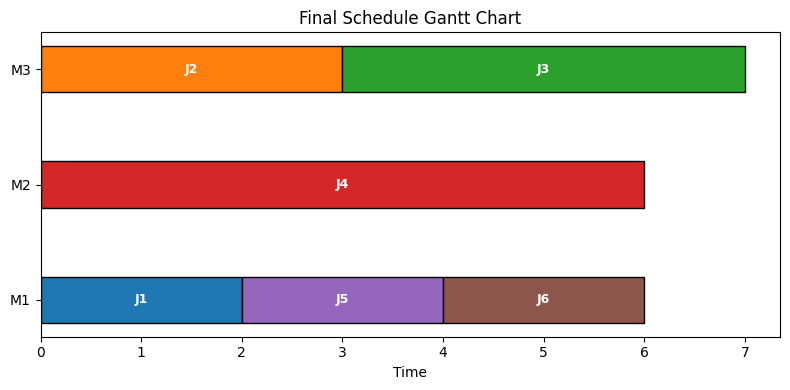

In [ ]:
if __name__ == "__main__":
    # Optional: fix the random seed for reproducibility
    # random.seed(42)

    best_sol, best_cost, iters, final_temp = simulated_annealing(
        initial_temp=100.0,
        alpha=0.8,
        min_temp=0.1,
        iterations_per_temp=2
    )

    print("SIMULATED ANNEALING FINISHED.")
    print(f"Number of iterations performed: {iters}")
    print(f"Final temperature: {final_temp:.4f}")

    # Convert to 1-based machine indexing for display
    one_based_sol = [m+1 for m in best_sol]

    print(f"Best solution found (machine assignment): {one_based_sol}")
    print("Assignment detail (Job i → Machine):")
    for job_index, m_id in enumerate(one_based_sol, start=1):
        print(f"  Job {job_index} → Machine {m_id}")

    print(f"Best makespan (cost): {best_cost}")

    # Visualize the final schedule
    visualize_schedule(best_sol)
